In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
! pip install pyforest

  Stored in directory: C:\Users\Deepak yadav\AppData\Local\pip\Cache\wheels\77\f9\78\51500678d6ce472b574216a40cba6c81d1766ee7cc838cce3c
Successfully built pyforest


In [221]:
import pandas_profiling

In [20]:
train = pd.read_csv("train_NIR5Yl1.csv")
test = pd.read_csv("test_8i3B3FC.csv")

In [21]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


In [22]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [77]:
print(train.shape)
print(test.shape)

(330045, 8)
(141448, 7)


#### Q1. Concatenate the two datasets: Train and Test. Add the column “Source” in the dataset which should tell us whether the points are from test dataset or train dataset 

In [25]:
train['Source'] = 'Train'

In [26]:
test['Source'] = 'Test'

In [32]:
#test = test[train.columns]

In [33]:
all_data = pd.concat([train,test], axis=0)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
all_data.head()

,Answers,ID,Reputation,Source,Tag,Upvotes,Username,Views
0,2.0,52664,3942.0,Train,a,42.0,155623,7855.0
1,12.0,327662,26046.0,Train,a,1175.0,21781,55801.0
2,4.0,468453,1358.0,Train,c,60.0,56177,8067.0
3,3.0,96996,264.0,Train,a,9.0,168793,27064.0
4,4.0,131465,4271.0,Train,c,83.0,112223,13986.0


In [36]:
all_data.shape

(471493, 8)

#### Q2.After concatenating are there any Null Values? How will you impute the null values using pattern in the dataset? 

In [37]:
all_data.info()
# As upvotes column is not present in test column, so we get null values in upvotes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471493 entries, 0 to 141447
Data columns (total 8 columns):
Answers       471493 non-null float64
ID            471493 non-null int64
Reputation    471493 non-null float64
Source        471493 non-null object
Tag           471493 non-null object
Upvotes       330045 non-null float64
Username      471493 non-null int64
Views         471493 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 32.4+ MB


In [38]:
all_data.describe()

,Answers,ID,Reputation,Upvotes,Username,Views
count,471493.000000,471493.000000,4.714930e+05,330045.000000,471493.000000,4.714930e+05
mean,3.916832,235747.000000,7.817481e+03,337.505358,81414.491477,2.970545e+04
std,3.578895,136108.449573,2.731903e+04,3592.441135,49164.428081,8.077310e+04
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00
25%,2.000000,117874.000000,2.830000e+02,8.000000,39948.000000,2.599000e+03
50%,3.000000,235747.000000,1.238000e+03,28.000000,78891.000000,8.961000e+03
75%,5.000000,353620.000000,5.120000e+03,107.000000,122455.000000,2.689900e+04
max,76.000000,471493.000000,1.042428e+06,615278.000000,175738.000000,5.231058e+06


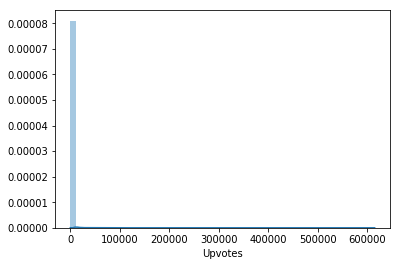

In [46]:
sns.distplot(all_data[all_data.Source=='Train']['Upvotes'])
# Highly right skewed data in upvotes column, so i will impute it with median

In [49]:
all_data.fillna(all_data.Upvotes.median(), inplace = True)

In [52]:
all_data.Upvotes.isnull().sum()

0

#### Q3. Is there a relationship between the Upvotes and Reputation? Generate a plot to support your answer.

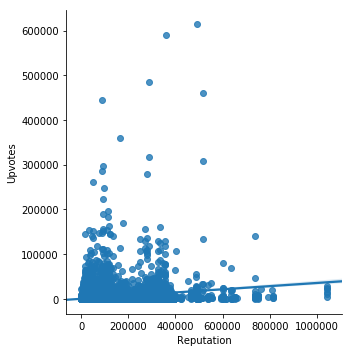

In [57]:
sns.lmplot(x='Reputation', y='Upvotes', data=train)
# Both are continuous variable so we plot a scatter plot
# Most of the datapoints for upvotes are below 1 lakh

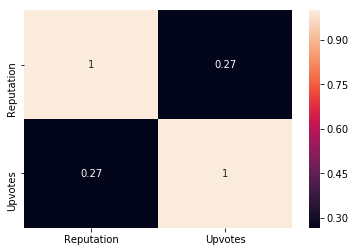

In [217]:
sns.heatmap(train[['Reputation','Upvotes']].corr(), annot = True)
# We have weak correlation b/w two variables

#### Q4. Generate a table for Views greater than 5000 and sort the values in descending order by Upvotes.

In [70]:
table = train[train.Views>5000].sort_values('Upvotes', ascending=False)
table.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Source
86457,160061,j,491244,39,88862,1815987,615278,Train
323367,451382,j,361277,20,70902,1011323,588966,Train
43972,213203,j,287981,21,32675,1225923,483995,Train
37080,316311,j,518066,32,30884,1068171,460447,Train
55806,194475,h,90911,29,6697,4417626,445709,Train


### Section B

#### Q5. Show the count of Tags column. Which tag has the highest number values? Show it using a plot. 

In [71]:
train.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

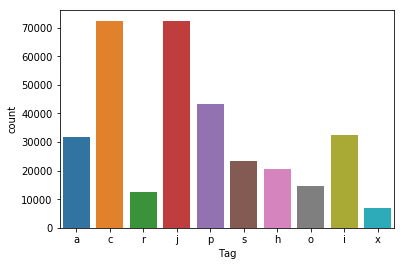

In [75]:
sns.countplot(train.Tag)
# c tag has highest no. of values

#### Q6. Create correlation matrix for the datasets and  plot the pairwise correlations.

In [83]:
train.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'Source'],
      dtype='object')

In [89]:
col = ['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

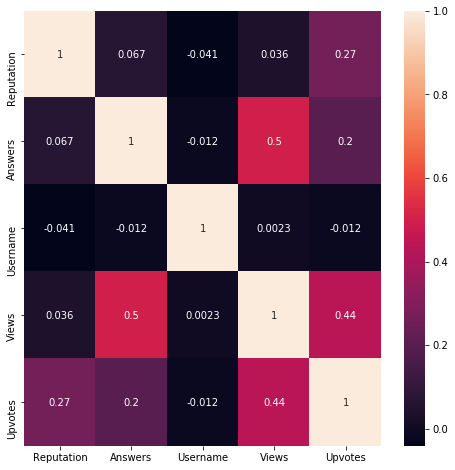

In [90]:
plt.figure(figsize = [8,8])
sns.heatmap(train[col].corr(), annot = True)
# max. +ve correlation is b/w views and upvotes

In [97]:
#train.Upvotes.value_counts()
# Answer - 63

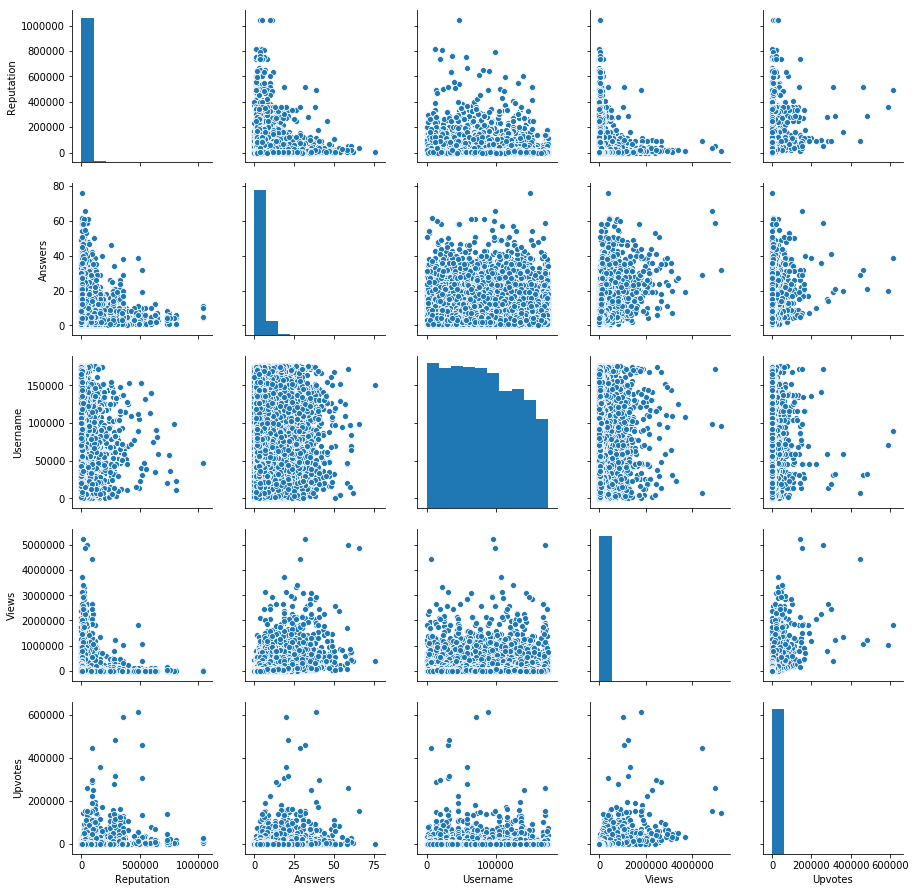

In [98]:
sns.pairplot(train[col])

#### Q7. Perform group by using column “tag” and plot the result using bar plot for Upvotes and answers. The plots should show the sum and the average. 

In [118]:
# Tag wise sum of upvotes
train.groupby('Tag')['Upvotes'].sum().plot(kind='bar')

Tag
a    10030204
c    23735061
h     7911376
i     3803327
j    39031622
o     1631440
p    17681927
r      983257
s     5528283
x     1055459
Name: Upvotes, dtype: int64

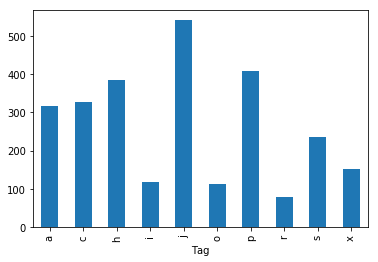

In [120]:
# Tag wise mean of upvotes
train.groupby('Tag')['Upvotes'].mean().plot(kind='bar')

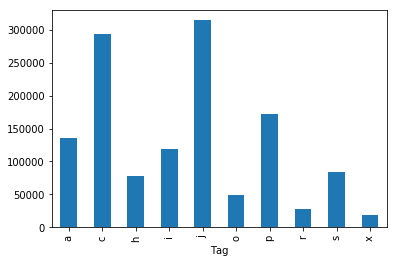

In [127]:
# Tag wise sum of Answers
train.groupby('Tag')['Answers'].sum().plot(kind='bar')

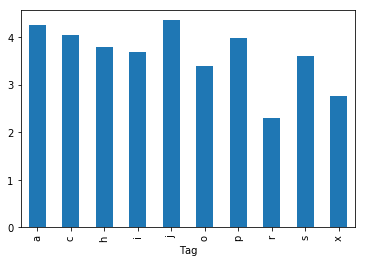

In [128]:
# Tag wise mean of Answers
train.groupby('Tag')['Answers'].mean().plot(kind='bar')

#### Q8. For Tag “j”, plot the distributions for the following columns:
a. Username
b. Views
c. Answers


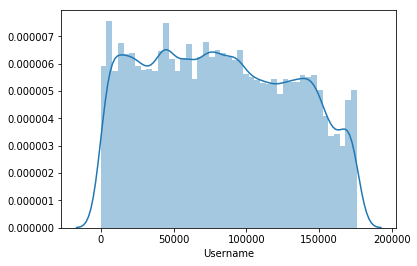

In [142]:
# Distribution for username where tag is 'j'
sns.distplot(train[train.Tag=='j']['Username'])
# Data is normally distributed there are no outliers in username column where tag is 'j'

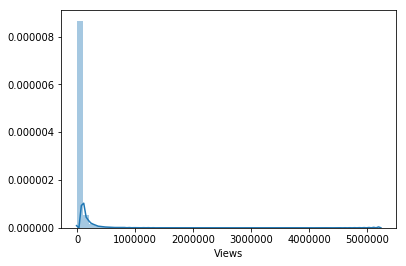

In [145]:
# Distribution for Views where tag is 'j'
sns.distplot(train[train.Tag=='j']['Views'])
# Right Skewed there are outliers present in the data where tag is 'j' in views column

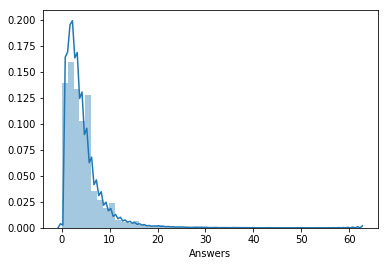

In [147]:
# Distribution for Answers where tag is 'j'
sns.distplot(train[train.Tag=='j']['Answers'])
#sns.boxplot(train[train.Tag=='j']['Answers'])

#### Q9. Are there any outliers in the data? Generate boxplots to support your answer.

In [148]:
train.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'Source'],
      dtype='object')

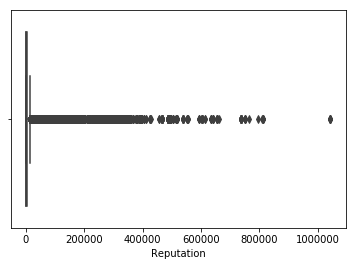

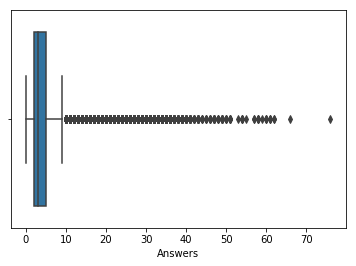

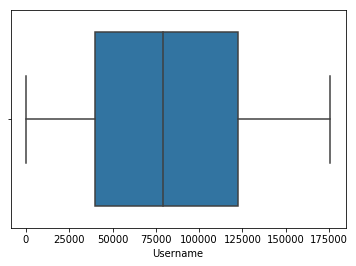

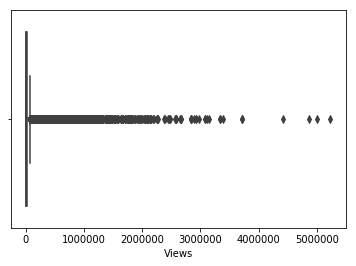

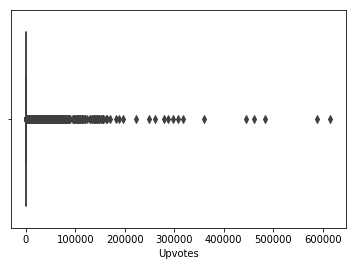

In [151]:
col = ['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']
for i in col:
    sns.boxplot(train[i])
    plt.show()
# Reputation, Answer, Views, Upvotes columns have outliers   

#### Q10(a). Get the polynomial features of the numerical columns in the dataset. 

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [176]:
numerical_col = train[col]
numerical_col.head()

,Reputation,Answers,Username,Views,Upvotes
0,3942,2,155623,7855,42
1,26046,12,21781,55801,1175
2,1358,4,56177,8067,60
3,264,3,168793,27064,9
4,4271,4,112223,13986,83


In [178]:
poly = PolynomialFeatures(2)
df1 = poly.fit_transform(numerical_col)
df2 = pd.DataFrame(df1)

In [179]:
# Polynomial feature of the numerical columns in the dataset
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,3942.0,2.0,155623.0,7855.0,42.0,15539364.0,7884.0,613465866.0,3.096441e+07,...,4.0,311246.0,15710.0,84.0,2.421852e+10,1.222419e+09,6536166.0,6.170102e+07,329910.0,1764.0
1,1.0,26046.0,12.0,21781.0,55801.0,1175.0,678394116.0,312552.0,567307926.0,1.453393e+09,...,144.0,261372.0,669612.0,14100.0,4.744120e+08,1.215402e+09,25592675.0,3.113752e+09,65566175.0,1380625.0
2,1.0,1358.0,4.0,56177.0,8067.0,60.0,1844164.0,5432.0,76288366.0,1.095499e+07,...,16.0,224708.0,32268.0,240.0,3.155855e+09,4.531799e+08,3370620.0,6.507649e+07,484020.0,3600.0
3,1.0,264.0,3.0,168793.0,27064.0,9.0,69696.0,792.0,44561352.0,7.144896e+06,...,9.0,506379.0,81192.0,27.0,2.849108e+10,4.568214e+09,1519137.0,7.324601e+08,243576.0,81.0
4,1.0,4271.0,4.0,112223.0,13986.0,83.0,18241441.0,17084.0,479304433.0,5.973421e+07,...,16.0,448892.0,55944.0,332.0,1.259400e+10,1.569551e+09,9314509.0,1.956082e+08,1160838.0,6889.0


#### Q10(b). Perform group by of the numerical columns with the column “Tag”, find their average and add those columns in the train dataset.    

In [194]:
train.groupby('Tag')['Reputation'].mean()

Tag
a     6065.168102
c    10566.420657
h     6985.072116
i     5238.884290
j     8285.527730
o     5656.755603
p     8062.053033
r     5290.282109
s     6545.661622
x     6456.155345
Name: Reputation, dtype: float64

In [202]:
group = train.groupby('Tag')['Reputation','Answers','Username','Views','Upvotes'].mean()
group

,Reputation,Answers,Username,Views,Upvotes
Tag,,,,,
a,6065.168102,4.259189,81496.349109,31800.916327,316.460136
c,10566.420657,4.047697,80334.959632,26746.676875,327.569916
h,6985.072116,3.778837,81933.633291,33948.958812,384.719704
i,5238.884290,3.679753,78998.210772,15806.680093,117.386636
j,8285.527730,4.347256,81861.391115,43291.211236,540.364686
o,5656.755603,3.380654,79516.507837,13504.645538,112.157294
p,8062.053033,3.977077,84852.298869,33184.984334,407.351971
r,5290.282109,2.304292,85050.551680,12033.055940,79.027246
s,6545.661622,3.600866,79245.883463,25807.082965,237.031385


In [204]:
group.columns = ['Reputation_Mean','Answers_Mean','Username_Mean','Views_Mean','Upvotes_Mean']

In [205]:
group

,Reputation_Mean,Answers_Mean,Username_Mean,Views_Mean,Upvotes_Mean
Tag,,,,,
a,6065.168102,4.259189,81496.349109,31800.916327,316.460136
c,10566.420657,4.047697,80334.959632,26746.676875,327.569916
h,6985.072116,3.778837,81933.633291,33948.958812,384.719704
i,5238.884290,3.679753,78998.210772,15806.680093,117.386636
j,8285.527730,4.347256,81861.391115,43291.211236,540.364686
o,5656.755603,3.380654,79516.507837,13504.645538,112.157294
p,8062.053033,3.977077,84852.298869,33184.984334,407.351971
r,5290.282109,2.304292,85050.551680,12033.055940,79.027246
s,6545.661622,3.600866,79245.883463,25807.082965,237.031385


In [207]:
group['Tag'] = ['a','c','h','i','j','o','p','r','s','x']

In [208]:
group

,Reputation_Mean,Answers_Mean,Username_Mean,Views_Mean,Upvotes_Mean,Tag
Tag,,,,,,
a,6065.168102,4.259189,81496.349109,31800.916327,316.460136,a
c,10566.420657,4.047697,80334.959632,26746.676875,327.569916,c
h,6985.072116,3.778837,81933.633291,33948.958812,384.719704,h
i,5238.884290,3.679753,78998.210772,15806.680093,117.386636,i
j,8285.527730,4.347256,81861.391115,43291.211236,540.364686,j
o,5656.755603,3.380654,79516.507837,13504.645538,112.157294,o
p,8062.053033,3.977077,84852.298869,33184.984334,407.351971,p
r,5290.282109,2.304292,85050.551680,12033.055940,79.027246,r
s,6545.661622,3.600866,79245.883463,25807.082965,237.031385,s


In [209]:
group.index = [0,1,2,3,4,5,6,7,8,9]

In [210]:
group

,Reputation_Mean,Answers_Mean,Username_Mean,Views_Mean,Upvotes_Mean,Tag
0,6065.168102,4.259189,81496.349109,31800.916327,316.460136,a
1,10566.420657,4.047697,80334.959632,26746.676875,327.569916,c
2,6985.072116,3.778837,81933.633291,33948.958812,384.719704,h
3,5238.884290,3.679753,78998.210772,15806.680093,117.386636,i
4,8285.527730,4.347256,81861.391115,43291.211236,540.364686,j
5,5656.755603,3.380654,79516.507837,13504.645538,112.157294,o
6,8062.053033,3.977077,84852.298869,33184.984334,407.351971,p
7,5290.282109,2.304292,85050.551680,12033.055940,79.027246,r
8,6545.661622,3.600866,79245.883463,25807.082965,237.031385,s
9,6456.155345,2.768845,81995.143881,16119.253941,151.255231,x


In [214]:
train2 = pd.merge(train, group, how='inner',on='Tag')
train2.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Source,Reputation_Mean,Answers_Mean,Username_Mean,Views_Mean,Upvotes_Mean
0,52664,a,3942,2,155623,7855,42,Train,6065.168102,4.259189,81496.349109,31800.916327,316.460136
1,327662,a,26046,12,21781,55801,1175,Train,6065.168102,4.259189,81496.349109,31800.916327,316.460136
2,96996,a,264,3,168793,27064,9,Train,6065.168102,4.259189,81496.349109,31800.916327,316.460136
3,106895,a,347,3,154557,22195,8,Train,6065.168102,4.259189,81496.349109,31800.916327,316.460136
4,292364,a,9051,2,58930,46305,363,Train,6065.168102,4.259189,81496.349109,31800.916327,316.460136
